# KNN Dating Clf

In [1]:
from matplotlib import pyplot
from numpy import array, zeros, shape, tile
from sklearn.neighbors import KNeighborsClassifier

## Load Data

In [3]:
fr = open('dataset/datingTestSet.txt')
fileSize = len(fr.readlines())  # 获得文件中的数据行的行数
X = zeros((fileSize, 3))
y = []
fr = open('dataset/datingTestSet.txt')
index = 0
for line in fr.readlines():
    line = line.strip()  # str.strip([chars]) 返回移除字符串头尾指定的字符生成的新字符串
    listFromLine = line.split('\t')  # 以 '\t' 切割字符串
    X[index, :] = listFromLine[0:3]  # 每列的属性数据
    y.append(int(listFromLine[-1]))  # 每列的类别数据，就是标签数据
    index += 1
print(len(X))

1000


## Explore Data

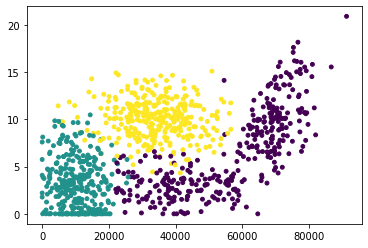

In [4]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], s=15, c=15.0 * array(y))
pyplot.show()

## Feature Engineering

In [5]:
def autoNorm(dataSet):
    """
    归一化特征值，消除属性之间量级不同导致的影响
    :param dataSet: 数据集
    :return: 归一化后的数据集normDataSet,ranges和minVals即最小值与范围，并没有用到

    归一化公式:
        Y = (X-Xmin)/(Xmax-Xmin)
        其中的 min 和 max 分别是数据集中的最小特征值和最大特征值。
        该函数可以自动将数字特征值转化为0到1的区间。
    """
    # 计算每种属性的最大值、最小值、范围
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 极差
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    dataSetSize = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (dataSetSize, 1))  # 生成与最小值之差组成的矩阵
    normDataSet = normDataSet / tile(ranges, (dataSetSize, 1))  # 将最小值之差除以范围组成矩阵
    return normDataSet, ranges, minVals

normMat, ranges, minVals = autoNorm(X)

## KNN Clf

In [6]:
knnClf = KNeighborsClassifier(n_neighbors=3)
knnClf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

## Predict and Compare

In [7]:
hoRatio = 0.1  # 设置训练集与测试集的比例
normMatSize = normMat.shape[0]  # 训练集的行数
X_testNb = int(normMatSize * hoRatio)
errorCount = 0.0

for i in range(X_testNb):
    result = knnClf.predict([X[i]])
    print("the classifier came back with: %d, the real answer is: %d" % (result, y[i]))
    if result != y[i]:
        errorCount += 1.0
print("the total error rate is: %f" % (errorCount / float(X_testNb)))

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe